In [1]:
from skimage import io
import skimage
from os import listdir
from os.path import isfile, join
from visualization import ishow

from SATMean import sat_mean
from SATMedian import sat_median
import matplotlib.pyplot as plt

In [2]:
# show array of images
def ishow_titles(imgs, titles):
    figSize=50
    fig=plt.figure(figsize=(figSize, figSize/2))
    columns = 4
    rows = int(len(imgs)/columns)
    if (len(imgs)%columns!=0):
        rows=rows+1
    for i in range(0, len(imgs)):
        sub = fig.add_subplot(rows, columns, i+1)
        sub.set_title(titles[i], fontdict={'fontsize': 50, 'fontweight': 'medium'})
        # im = imgs[i][imgs[i]>0]
        plt.imshow(imgs[i])#,cmap='gray')
    plt.show()

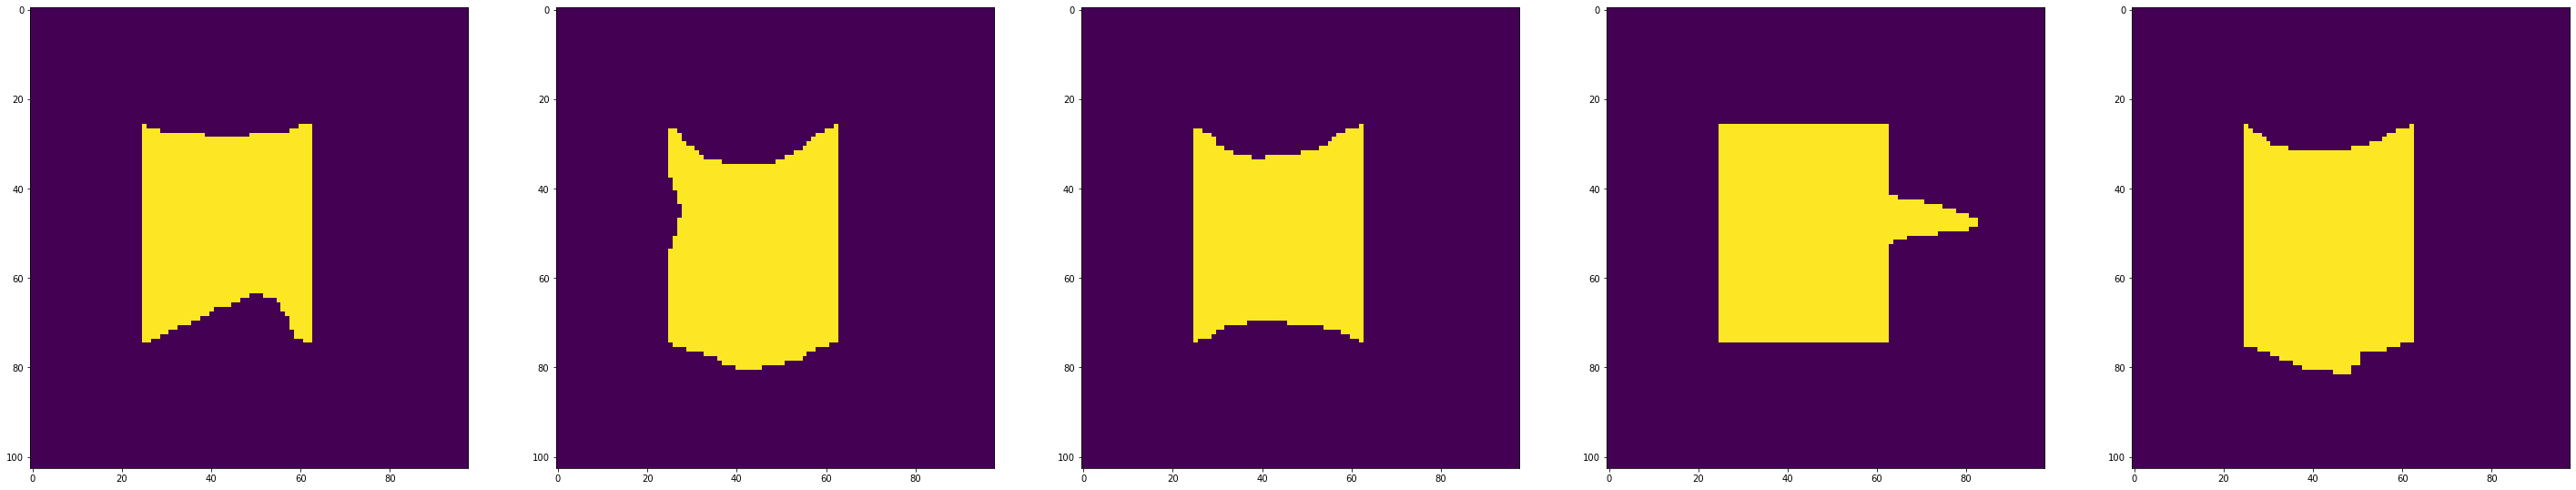

In [3]:
path = 'example_images/scheme/'
file_names = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith(".tif")]
img_list = []
for file_name in file_names:
    img = skimage.io.imread(fname=path + file_name, as_gray=True);
    skimage.io.imsave(fname=path +'/' + file_name[:-4] + '.tif', arr=img, check_contrast=False)
    img_list.append(img)
ishow(img_list)

In [4]:
sat_mean_result = sat_mean(False, img_list, 5, 20)
sat_median_result = sat_median(False, img_list, 5, 20)


sat_mean_result[sat_mean_result > 0]=1
sat_median_result[sat_median_result > 0]=1
img_list[0][img_list[0] > 0]=1

/home/alex/PycharmProjects/SAT_latest/SATMean.py:390: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  points_fitted = np.vstack(spl(alpha) for spl in splines).T


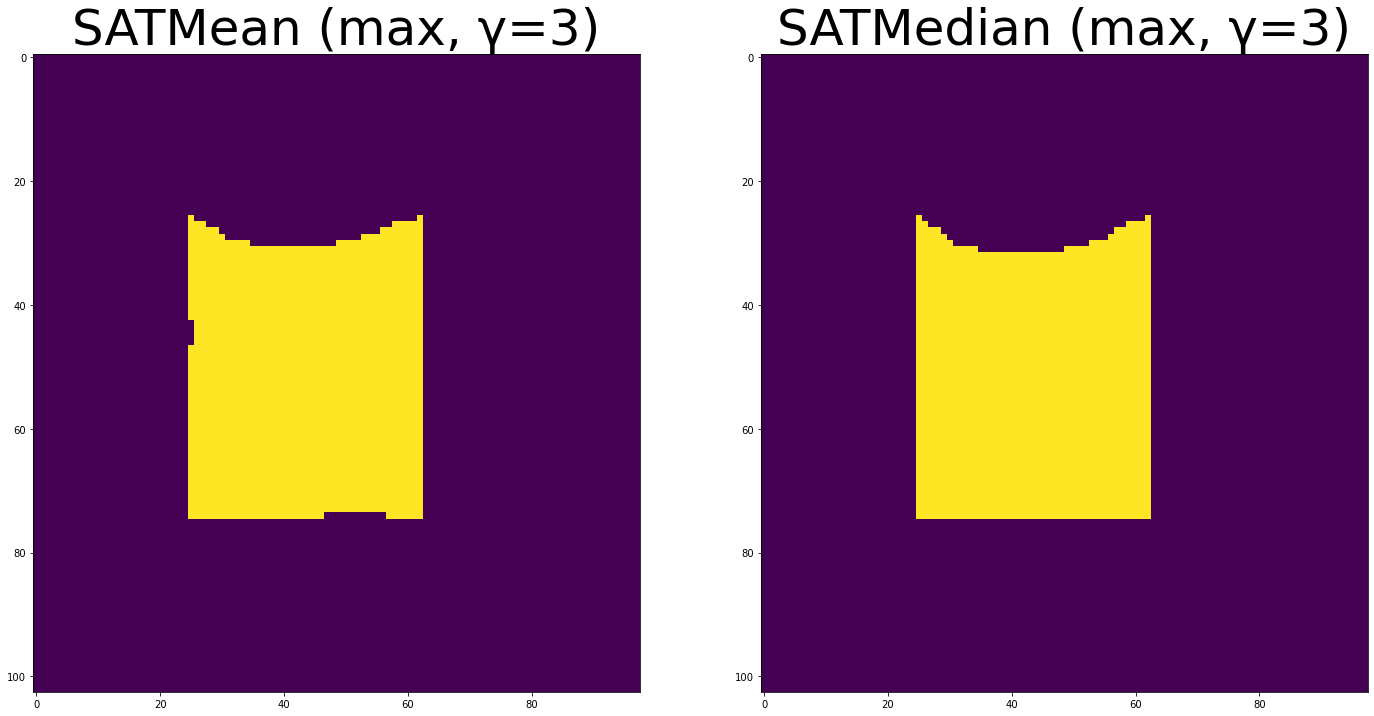

In [6]:
ishow_titles([sat_mean_result, sat_median_result],
      ['SATMean (max, γ=3)', 'SATMedian (max, γ=3)'])